# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

## 1. Preprocessing

1. Read the file `checker_regression.csv`.
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df = pd.read_csv('../data/checker_regression.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    59 non-null     float64
 3   AVG(diff)    18 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [3]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [4]:
df.head()

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.0
1,user_1,62,28.0,0.0
2,user_1,62,28.0,0.0
3,user_1,62,28.0,0.0
4,user_1,62,28.0,0.0


In [5]:
le = LabelEncoder()
df['uid'] = le.fit_transform(df['uid'])
df.head()

,uid,num_commits,pageviews,AVG(diff)
0,0,62,28.0,0.0
1,0,62,28.0,0.0
2,0,62,28.0,0.0
3,0,62,28.0,0.0
4,0,62,28.0,0.0


In [6]:
X = df.drop(columns=['AVG(diff)'])
y = df['AVG(diff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [7]:
def crosval(n_splits, X, y, model):

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)

    scores = []
    result = []

    for test_index, train_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        train_score = root_mean_squared_error(y_train, pred_train)
        test_score = root_mean_squared_error(y_test, pred_test)
        
        result.append(f"train -  {train_score}   |   test -  {test_score}")
        
        scores.append(test_score)

    average_rmse = np.mean(scores)
    result.append(f"Average RMSE on crossval is {average_rmse}")
    
    return result

In [8]:
regr = LinearRegression(fit_intercept=False)
for item in crosval(10, X, y, regr):
    print(item)

train -  50.802204166614885   |   test -  87.12987681731401
train -  24.414057956580248   |   test -  69.08705952265143
train -  0.0   |   test -  56.602791685305135
train -  46.13600240165791   |   test -  49.576551577747566
train -  32.92915077771164   |   test -  66.0192089139524
train -  0.7020472561449489   |   test -  56.48916047359732
train -  26.677700004500203   |   test -  51.02418518941079
train -  7.881996852193616   |   test -  50.48035946213878
train -  26.4594010535416   |   test -  50.86208314897175
train -  25.6523142361789   |   test -  64.32531287987638
Average RMSE on crossval is 60.15965896709655


In [9]:
dtree = DecisionTreeRegressor(random_state=21, max_depth=2)
for item in crosval(10, X, y, dtree):
    print(item)

train -  7.75   |   test -  56.37304995181265
train -  0.0   |   test -  45.42876982727271
train -  0.0   |   test -  56.602791685305135
train -  0.0   |   test -  41.035697756199596
train -  2.5666666666666664   |   test -  44.3472495048717
train -  0.0   |   test -  55.76420931980298
train -  0.0   |   test -  53.047099510770956
train -  0.0   |   test -  46.59922528990206
train -  11.937668805421621   |   test -  37.9539512655358
train -  0.0   |   test -  73.71806968185648
Average RMSE on crossval is 51.08701137933301


In [10]:
rfor = RandomForestRegressor(random_state=21, max_depth=25, n_estimators=100)
for item in crosval(10, X, y, rfor):
    print(item)

train -  33.61439393883217   |   test -  45.47330947122391
train -  15.0775561680267   |   test -  48.385385165197775
train -  0.0   |   test -  56.602791685305135
train -  19.35553733431344   |   test -  39.467020508108284
train -  20.53550674779877   |   test -  36.91745774504913
train -  0.35700140055747676   |   test -  56.35178786562299
train -  12.04691738535562   |   test -  44.587211157035576
train -  4.666505269317868   |   test -  49.95867252516014
train -  21.26723967544212   |   test -  44.008827100177676
train -  23.019848218439684   |   test -  56.568664827968554
Average RMSE on crossval is 47.83211280508492


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [11]:
def draw_plot(y, pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y, pred, alpha=0.5)
    plt.xlabel('actual average')
    plt.ylabel('prediction')
    plt.title('Results')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.show()

In [12]:
regr_pred = regr.predict(X_test)

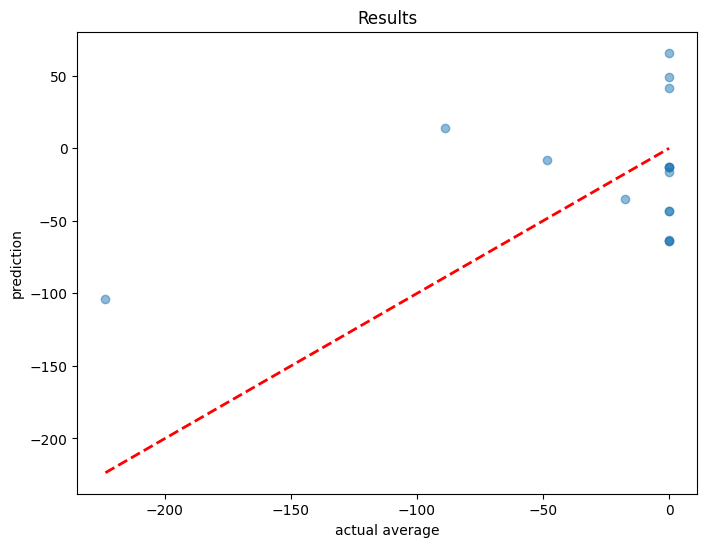

In [13]:
draw_plot(y_test, regr_pred)

In [14]:
dtree_pred = dtree.predict(X_test) 

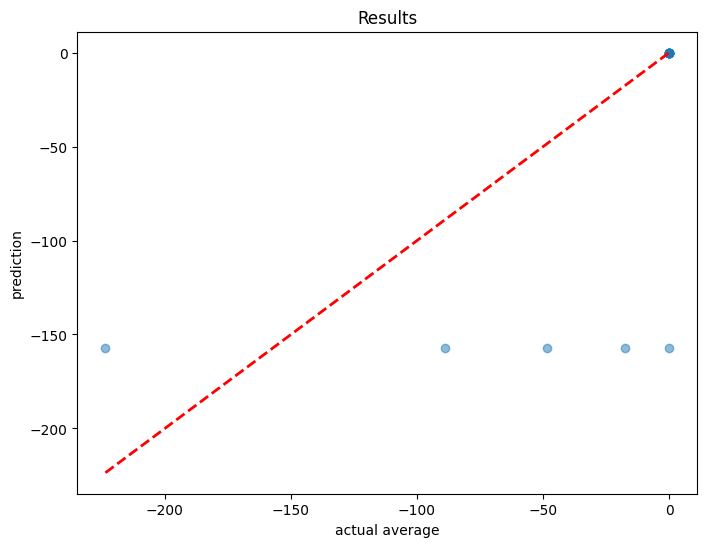

In [15]:
draw_plot(y_test, dtree_pred)

In [16]:
rfor_pred = rfor.predict(X_test)

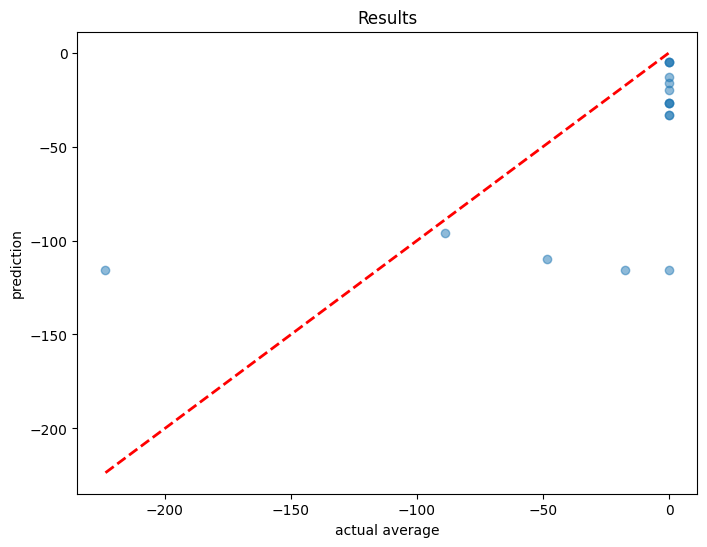

In [17]:
draw_plot(y_test, rfor_pred)

In the ideal case all the dots would be on line `y = x`